In [1]:
import numpy as np

import sklearn.linear_model as skl_lm

import matplotlib.pyplot as plt

### G-Research test sample
Q: _Suppose that $X$ and $Y$ are mean zero, unit variance random variables. If least squares regression (without intercept) of $Y$ against $X$ gives a slope of $\beta$ (i.e. it minimises $\mathbb E[(Y-\beta X)^2]$), what is the slope of the regression of $X$ against $Y$?_

$$\beta = \min_\beta \mathbb E[(Y-\beta X)^2]= \mathbb E[Y^2]-\beta^2\mathbb E[X^2]+2\beta\mathbb E[XY] \Rightarrow -2\beta\mathbb E[X^2]+2\mathbb E[XY]=0\,\quad \beta =\frac{\mathbb E[XY]}{\mathbb E[X^2]}.$$

If $\mathbb E[X^2]=\mathbb E[Y^2]$, slope will be identical.

Experiment works by changing the value of ``y_mod``.

In [2]:
n_sample = 1000

beta = 0.86

y_mod = 1

X = np.random.exponential(scale = 1, size = n_sample) - 1

y = (beta*X + np.random.normal(loc = 0, scale = np.sqrt(1-beta**2), size = n_sample))*y_mod

print(X.mean(),y.mean())
print(X.var(),y.var())

-0.011414852127521946 -0.01030521887462442
0.970169399710374 0.972278702118128


In [3]:
model = skl_lm.LinearRegression().fit(X.reshape(-1, 1),y.reshape(-1, 1))
y_bX = model.coef_[0,0]

model = skl_lm.LinearRegression().fit(y.reshape(-1, 1),X.reshape(-1, 1))
X_by = model.coef_[0,0]

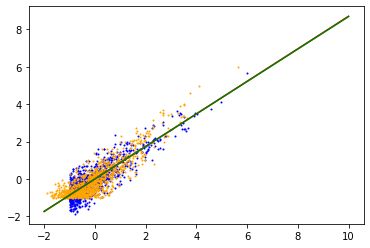

In [4]:
h=np.linspace(-2,10,5)

plt.scatter(X,y,color='blue',s = 1)
plt.scatter(y,X,color='orange',s = 1)
plt.plot(h,y_bX*h,color = 'red')
plt.plot(h,X_by*h,color = 'green')
plt.show()